In [4]:
import pandas as pd
df_original = pd.read_csv("data/raw/nlp/mtsamples/mtsamples.csv")
df_original.head()

Unnamed: 0  \
0  0            
1  1            
2  2            
3  3            
4  4            

                                                         description  \
0   A 23-year-old white female presents with complaint of allergies.   
1   Consult for laparoscopic gastric bypass.                           
2   Consult for laparoscopic gastric bypass.                           
3   2-D M-Mode. Doppler.                                               
4   2-D Echocardiogram                                                 

             medical_specialty                                sample_name  \
0   Allergy / Immunology         Allergic Rhinitis                          
1   Bariatrics                   Laparoscopic Gastric Bypass Consult - 2    
2   Bariatrics                   Laparoscopic Gastric Bypass Consult - 1    
3   Cardiovascular / Pulmonary   2-D Echocardiogram - 1                     
4   Cardiovascular / Pulmonary   2-D Echocardiogram - 2                     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [9]:
import pandas as pd
df = pd.read_csv('data/processed/nlp/mtsamples/mtsamples_MLM.csv')
pd.set_option('display.max_colwidth', -1)
df.head()

/var/folders/7p/lw9128713_9433llvvhnlv680000gn/T/ipykernel_9278/2141448523.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords,keywords_list,nr_candidates,top_n,transcription_f_MLM_weights,transcription_f_MLM
0,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,mode leave atrial enlargement leave atrial diameter normal size right leave ventricle normal lv systolic function leave ventricular ejection fraction normal lv diastolic function pericardial effusion normal morphology aortic valve mitral valve tricuspid valve pulmonary valve pa systolic pressure mmhg doppler mild mitral tricuspid regurgitation trace aortic pulmonary regurgitation,"cardiovascular / pulmonary, 2-d m-mode, doppler, aortic valve, atrial enlargement, diastolic function, ejection fraction, mitral, mitral valve, pericardial effusion, pulmonary valve, regurgitation, systolic function, tricuspid, tricuspid valve, normal lv","['cardiovascular / pulmonary', ' 2-d m-mode', ' doppler', ' aortic valve', ' atrial enlargement', ' diastolic function', ' ejection fraction', ' mitral', ' mitral valve', ' pericardial effusion', ' pulmonary valve', ' regurgitation', ' systolic function', ' tricuspid', ' tricuspid valve', ' normal lv ']",19,13,"[('ventricle', 0.8142), ('regurgitation', 0.805), ('pericardial', 0.7968), ('tricuspid', 0.795), ('ventricular', 0.7899), ('diastolic', 0.7848), ('effusion', 0.7644), ('aortic', 0.7609), ('pa', 0.7583), ('lv', 0.7582), ('systolic', 0.7546), ('atrial', 0.7376), ('ejection', 0.7314)]","['ventricle', 'regurgitation', 'pericardial', 'tricuspid', 'ventricular', 'diastolic', 'effusion', 'aortic', 'pa', 'lv', 'systolic', 'atrial', 'ejection']"
1,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,leave ventricular cavity size wall thickness normal wall motion leave ventricular systolic function appear hyperdynamic estimate ejection fraction near cavity obliteration see appear increase leave ventricular outflow tract gradient mid cavity level consistent hyperdynamic leave ventricular systolic function abnormal leave ventricular relaxation pattern see well elevate leave atrial pressure see doppler leave atrium appear mildly dilate right atrium right ventricle normal aortic root appear normal aortic va,"cardiovascular / pulmonary, 2-d, doppler, echocardiogram, annular, aortic root, aortic valve, atrial, atrium, calcification, cavity, ejection fraction, mitral, obliteration, outflow, regurgitation, relaxation pattern, stenosis, systolic function, tricuspid, valve, ventricular, ventricular cavity, wall motion, pulmonary artery","['cardiovascular / pulmonary', ' 2-d', ' doppler', ' echocardiogram', ' annular', ' aortic root', ' aortic valve', ' atrial', ' atrium', ' calcification', ' cavity', ' ejection fraction', ' mitral', ' obliteration', ' outflow', ' regurgitation', ' relaxation pattern', ' stenosis', ' systolic function', ' tricuspid', ' valve', ' ventricular', ' ventricular cavity', ' wall motion', ' pulmonary artery']",26,18,"[('ventricle', 0.8222), ('obliteration', 0.8123), ('ventricular', 0.8071), ('hyperdynamic', 0.8055), ('elevate', 0.7727), ('outflow', 0.7572), ('atrium', 0.755), ('atrial', 0.7542), ('aortic', 0.7446), ('va', 0.7355), ('dilate', 0.7345), ('doppler', 0.7303), ('systolic', 0.729), ('ejection', 0.7195), ('right', 0.6793), ('pressure', 0.6738), ('wall', 0.6532), ('function', 0.6395)]","['ventricle', 'obliteration', 'ventricular', 'hyperdynamic', 'elevate', 'outflow', 'atrium', 'atrial', 'aortic', 'va', 'dilate', 'doppler', 'systolic', 'ejection', 'right', 'pressure', 'wall', 'function']"
2,7,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 3,echocardiogram multiple view heart great vessels normal intracardiac great vessel relationships cardiac function normal chamber enlargement hypertrophy pericardial effusion vegetations see doppler interrogation include color flow image reveal systemic venous return right atrium normal tricuspid inflow pulmonary outflow normal valve pulmonary venous return leave atrium interat

In [46]:
#model evaluation compare MLM and TC model
#model evaluation compare MLM and TC model  (MTsamples)     (MIMIC)     (MTsamples)     (MIMIC)         
#metrics to use: precision, recall, f1-score, support
#compare the results of the TC model with the results of the MLM model  
#compare how many same extracted keywords are in the TC model and the MLM model
df_MLM = pd.read_csv('data/processed/nlp/mtsamples/mtsamples_MLM.csv')
df_TC = pd.read_csv('data/processed/nlp/mtsamples/mtsamples_TC.csv')
#compare the results of the TC model with the results of the MLM model
#compare how many same extracted keywords are in the TC model and the MLM model
df_both = pd.merge(df_MLM, df_TC, on='transcription', how='inner')
#df_both['percentage_same_keywords'] = df_both.apply(lambda x: len(set(x['keywords_x']).intersection(set(x['keywords_y'])))/len(set(x['keywords_x']).union(set(x['keywords_y']))), axis=1)

#only keep transcription, transcription_f_MLM, transcription_f_TC, nr_candidates, top_n, percentage_same_keywords


In [70]:
#drop na
df_both = df_both.dropna()
df_both = df_both[df_both['nr_candidates_x'] != 0]

#import ast
from ast import literal_eval
#df_both['transcription_f_MLM'] = df_both['transcription_f_MLM'].apply(lambda x: literal_eval(x))
#df_both['transcription_f_TC'] = df_both['transcription_f_TC'].apply(lambda x: literal_eval(x))

In [71]:
#find percentage of same keywords which are in transcription_f_MLM, transcription_f_TC
df_both['percentage_same_keywords_oben'] = df_both.apply(lambda x: len(set(x['transcription_f_MLM']).intersection(set(x['transcription_f_TC']))), axis=1)
                                                         #/len(set(x['transcription_f_MLM']).union(set(x['transcription_f_TC']))), axis=1)
df_both['percentage_same_keywords_unten'] = df_both.apply(lambda x: len(set(x['transcription_f_MLM']).union(set(x['transcription_f_TC']))), axis=1)

df_both['percentage_same_keywords'] = df_both.apply(lambda x: x['percentage_same_keywords_oben']/x['percentage_same_keywords_unten'], axis=1)

In [72]:

df_both[['percentage_same_keywords', 'transcription', 'transcription_f_MLM', 'transcription_f_TC', 'nr_candidates_x', 'top_n_x', 'nr_candidates_y', 'top_n_y']].head()

,percentage_same_keywords,transcription,transcription_f_MLM,transcription_f_TC,nr_candidates_x,top_n_x,nr_candidates_y,top_n_y
0,0.529412,mode leave atrial enlargement leave atrial diameter normal size right leave ventricle normal lv systolic function leave ventricular ejection fraction normal lv diastolic function pericardial effusion normal morphology aortic valve mitral valve tricuspid valve pulmonary valve pa systolic pressure mmhg doppler mild mitral tricuspid regurgitation trace aortic pulmonary regurgitation,"[ventricle, regurgitation, pericardial, tricuspid, ventricular, diastolic, effusion, aortic, pa, lv, systolic, atrial, ejection]","[diastolic, pericardial, lv, effusion, tricuspid, atrial, ejection, systolic, ventricle, doppler, function, trace, fraction]",19,13,19,13
1,0.529412,mode leave atrial enlargement leave atrial diameter normal size right leave ventricle normal lv systolic function leave ventricular ejection fraction normal lv diastolic function pericardial effusion normal morphology aortic valve mitral valve tricuspid valve pulmonary valve pa systolic pressure mmhg doppler mild mitral tricuspid regurgitation trace aortic pulmonary regurgitation,"[ventricle, regurgitation, pericardial, tricuspid, ventricular, diastolic, effusion, aortic, pa, lv, systolic, atrial, ejection]","[diastolic, pericardial, lv, effusion, tricuspid, atrial, ejection, systolic, ventricle, doppler, function, trace, fraction]",19,13,19,13
2,0.529412,mode leave atrial enlargement leave atrial diameter normal size right leave ventricle normal lv systolic function leave ventricular ejection fraction normal lv diastolic function pericardial effusion normal morphology aortic valve mitral valve tricuspid valve pulmonary valve pa systolic pressure mmhg doppler mild mitral tricuspid regurgitation trace aortic pulmonary regurgitation,"[ventricle, regurgitation, pericardial, tricuspid, ventricular, diastolic, effusion, aortic, pa, lv, systolic, atrial, ejection]","[diastolic, pericardial, lv, effusion, tricuspid, atrial, ejection, systolic, ventricle, doppler, function, trace, fraction]",19,13,19,13
3,0.529412,mode leave atrial enlargement leave atrial diameter normal size right leave ventricle normal lv systolic function leave ventricular ejection fraction normal lv diastolic function pericardial effusion normal morphology aortic valve mitral valve tricuspid valve pulmonary valve pa systolic pressure mmhg doppler mild mitral tricuspid regurgitation trace aortic pulmonary regurgitation,"[ventricle, regurgitation, pericardial, tricuspid, ventricular, diastolic, effusion, aortic, pa, lv, systolic, atrial, ejection]","[diastolic, pericardial, lv, effusion, tricuspid, atrial, ejection, systolic, ventricle, doppler, function, trace, fraction]",19,13,19,13
4,0.565217,leave ventricular cavity size wall thickness normal wall motion leave ventricular systolic function appear hyperdynamic estimate ejection fraction near cavity obliteration see appear increase leave ventricular outflow tract gradient mid cavity level consistent hyperdynamic leave ventricular systolic function abnormal leave ventricular relaxation pattern see well elevate leave atrial pressure see doppler leave atrium appear mildly dilate right atrium right ventricle normal aortic root appear normal aortic va,"[ventricle, obliteration, ventricular, hyperdynamic, elevate, outflow, atrium, atrial, aortic, va, dilate, doppler, systolic, ejection, right, pressure, wall, function]","[hyperdynamic, outflow, dilate, ventricular, wall, relaxation, ventricle, ejection, va, atrium, mildly, function, fraction, doppler, systolic, gradient, mid, obliteration]",26,18,26,18


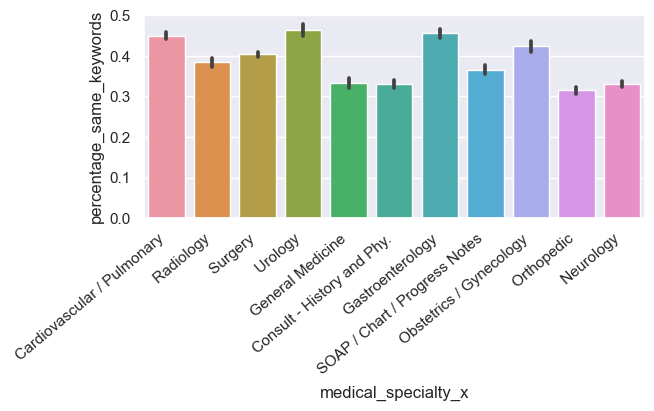

In [74]:
#visualize percentage_same_keywords average for different medical specialties
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(6.7,4.27)})
ax = sns.barplot(x="medical_specialty_x", y="percentage_same_keywords", data=df_both)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


In [75]:
#how many keywords top n on average are extracted from each medical specialty
df_both.groupby('medical_specialty_x')['top_n_x'].mean()

medical_specialty_x
 Cardiovascular / Pulmonary       17.390566
 Consult - History and Phy.       19.004819
 Gastroenterology                 16.803069
 General Medicine                 19.177536
 Neurology                        18.428986
 Obstetrics / Gynecology          17.625000
 Orthopedic                       17.781553
 Radiology                        17.628231
 SOAP / Chart / Progress Notes    19.233463
 Surgery                          17.333333
 Urology                          17.371429
Name: top_n_x, dtype: float64

In [69]:
#drop rows where nr_candidates_x = 0
df_both = df_both[df_both['nr_candidates_x'] != 0]

,Unnamed: 0_x,description_x,medical_specialty_x,sample_name_x,transcription,keywords_x,keywords_list_x,nr_candidates_x,top_n_x,transcription_f_MLM_weights,...,sample_name_y,keywords_y,keywords_list_y,nr_candidates_y,top_n_y,transcription_f_TC_weights,transcription_f_TC,percentage_same_keywords,percentage_same_keywords_oben,percentage_same_keywords_unten
2368,872,EGD with dilation for dysphagia.,Surgery,EGD with Dilation,indication,"surgery, egd, hurricaine spray, olympus endoscope, savary wire, cricopharyngeus, decubitus, dilator, duodenum, dysphagia, esophagus, hiatal hernia, peptic, pylorus, stomach, tortuosity, egd with dilation, tortuous, scope, hiatal, hernia,","['surgery', ' egd', ' hurricaine spray', ' olympus endoscope', ' savary wire', ' cricopharyngeus', ' decubitus', ' dilator', ' duodenum', ' dysphagia', ' esophagus', ' hiatal hernia', ' peptic', ' pylorus', ' stomach', ' tortuosity', ' egd with dilation', ' tortuous', ' scope', ' hiatal', ' hernia', '']",0,0,[],...,EGD with Dilation,"surgery, egd, hurricaine spray, olympus endoscope, savary wire, cricopharyngeus, decubitus, dilator, duodenum, dysphagia, esophagus, hiatal hernia, peptic, pylorus, stomach, tortuosity, egd with dilation, tortuous, scope, hiatal, hernia,","['surgery', ' egd', ' hurricaine spray', ' olympus endoscope', ' savary wire', ' cricopharyngeus', ' decubitus', ' dilator', ' duodenum', ' dysphagia', ' esophagus', ' hiatal hernia', ' peptic', ' pylorus', ' stomach', ' tortuosity', ' egd with dilation', ' tortuous', ' scope', ' hiatal', ' hernia', '']",0,0,[],[],{},0,0
2369,872,EGD with dilation for dysphagia.,Surgery,EGD with Dilation,indication,"surgery, egd, hurricaine spray, olympus endoscope, savary wire, cricopharyngeus, decubitus, dilator, duodenum, dysphagia, esophagus, hiatal hernia, peptic, pylorus, stomach, tortuosity, egd with dilation, tortuous, scope, hiatal, hernia,","['surgery', ' egd', ' hurricaine spray', ' olympus endoscope', ' savary wire', ' cricopharyngeus', ' decubitus', ' dilator', ' duodenum', ' dysphagia', ' esophagus', ' hiatal hernia', ' peptic', ' pylorus', ' stomach', ' tortuosity', ' egd with dilation', ' tortuous', ' scope', ' hiatal', ' hernia', '']",0,0,[],...,EGD with Dilation,"gastroenterology, egd, hurricaine spray, olympus endoscope, savary wire, cricopharyngeus, decubitus, dilator, duodenum, dysphagia, esophagus, hiatal hernia, peptic, pylorus, stomach, tortuosity, egd with dilation, tortuous, scope, hiatal, hernia,","['gastroenterology', ' egd', ' hurricaine spray', ' olympus endoscope', ' savary wire', ' cricopharyngeus', ' decubitus', ' dilator', ' duodenum', ' dysphagia', ' esophagus', ' hiatal hernia', ' peptic', ' pylorus', ' stomach', ' tortuosity', ' egd with dilation', ' tortuous', ' scope', ' hiatal', ' hernia', '']",0,0,[],[],{},0,0
2370,3579,EGD with dilation for dysphagia.,Gastroenterology,EGD with Dilation,indication,"gastroenterology, egd, hurricaine spray, olympus endoscope, savary wire, cricopharyngeus, decubitus, dilator, duodenum, dysphagia, esophagus, hiatal hernia, peptic, pylorus, stomach, tortuosity, egd with dilation, tortuous, scope, hiatal, hernia,","['gastroenterology', ' egd', ' hurricaine spray', ' olympus endoscope', ' savary wire', ' cricopharyngeus', ' decubitus', ' dilator', ' duodenum', ' dysphagia', ' esophagus', ' hiatal hernia', ' peptic', ' pylorus', ' stomach', ' tortuosity', ' egd with dilation', ' tortuous', ' scope', ' hiatal', ' hernia', '']",0,0,[],...,EGD with Dilation,"surgery, egd, hurricaine spray, olympus endoscope, savary wire, cricopharyngeus, decubitus, dilator, duodenum, dysphagia, esophagus, hiatal hernia, peptic, pylorus, stomach, tortuosity, egd with dilation, tortuous, scope, hiatal, hernia,","['surgery', ' egd', ' hurricaine spray', ' olympus endoscope', ' savary wire', ' cricopharyngeus', ' decubitus', ' dilator', ' duodenum', ' dysphagia', ' esophagus', ' hiatal hernia', ' peptic', ' pylorus', ' stomach', ' tortuosity', ' egd with dilation', ' tortuo

# Tests

In [7]:
#size of the dataset
df.shape

(3010, 11)

In [ ]:
from transformers import AutoTokenizer, pipeline
import os

MODEL_MLM_DIR_MT = os.path.join("models", "nlp", "maskedlanguagemodel_Mtsamples", "model")
model = MODEL_MLM_DIR_MT

In [ ]:
from keybert import KeyBERT

In [ ]:
doc1 = """
         Supervised learning is the machine learning task of learning a function that
         maps an input to an output based on example input-output pairs. It infers a
         function from labeled training data consisting of a set of training examples.
         In supervised learning, each example is a pair consisting of an input object
         (typically a vector) and a desired output value (also called the supervisory signal). 
         A supervised learning algorithm analyzes the training data and produces an inferred function, 
         which can be used for mapping new examples. An optimal scenario will allow for the 
         algorithm to correctly determine the class labels for unseen instances. This requires 
         the learning algorithm to generalize from the training data to unseen situations in a 
         'reasonable' way (see inductive bias).
    """

In [ ]:
df = pd.DataFrame(
    [[doc1, 20, 10], [doc1, 15, 8], [doc1, 10, 5], [doc1, 10, 5], [doc1, 10, 5]],
    columns=["transcription", "cand", "top"],
)
df.head()


In [ ]:
kw_model = KeyBERT(model=model)

for doc in [doc1, doc1, doc1, doc1, doc1]:
    keywords = kw_model.extract_keywords(
        doc,
        keyphrase_ngram_range=(1, 2),
        stop_words="english",
        use_maxsum=True,
        nr_candidates=20,
        top_n=10,
        use_mmr=True,
        diversity=0.5,
    )
    print(keywords)


In [ ]:
def extract_keywords(docs, nr_candidates, top_n):

    keywords = kw_model.extract_keywords(
        docs,
        keyphrase_ngram_range=(1, 2),
        stop_words="english",
        use_maxsum=True,
        nr_candidates=nr_candidates,
        top_n=max(top_n),
        use_mmr=True,
        diversity=0.5,
    )

    return keywords
    
df["keywords"] = extract_keywords(df["transcription"], df["cand"], df["top"])

In [ ]:
df.head()

In [ ]:
df.keywords = df.apply(lambda x: x["keywords"][:x["top"]], axis=1)
df.keywords[1]

In [ ]:
[
    ("way inductive", 0.8061),
    ("called supervisory", 0.7575),
    ("analyzes training", 0.7573),
    ("consisting set", 0.7301),
    ("correctly determine", 0.7272),
]


In [ ]:
#17.7
# ohne diversity: 11.7

In [ ]:
import pandas as pd

df = pd.DataFrame([[1,2,3,4], [5,6,7,8], [9,10,11,12]], columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame([[1,2,3,5], [5,6,7,9], [9,10,11,13]], columns=['a', 'b', 'c', 'e'])

In [ ]:
df

In [ ]:
df2

In [ ]:
pd.concat([df, df2], axis=1)

# KEYBERT MIMIC

In [1]:
"""
Description:
    This script is used to extract keywords from the medical transcription
"""

import pandas as pd
from keybert import KeyBERT
from transformers import AutoTokenizer, pipeline

from src.nlp.constants import (
    # MODEL_MLM_DIR,
    MODEL_TC_MIMIC_DIR,
    MIMIC_PROCESSED_CLEANED_DIR,
    MIMIC_TC_DIR,)

2022-12-02 13:48:50.301960: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:


def keyword_extraction(x: str, model, nr_candidates: int, top_n: int) -> list[tuple]:
    """
    This function extracts keywords from the input text.
    Parameters
    ----------
    x : str
        Input sentence.
    model : str
        Path to the model to use for keyword extraction
    Returns
    -------
    list[str]
        List of keywords.
    """
    tokenizer = AutoTokenizer.from_pretrained(model, model_max_lenght=512)

    hf_model = pipeline(
        "feature-extraction",
        model=model,
        tokenizer=tokenizer,
    )
    kw_model = KeyBERT(model=hf_model)
    keywords = kw_model.extract_keywords(
        x,
        keyphrase_ngram_range=(1, 1),
        stop_words="english",
        use_maxsum=True,
        nr_candidates=2
        top_n=2,
        use_mmr=True,
        diversity=0.5    )
    return keywords


# extract keywords from transcription column and create new column with keywords



SyntaxError: invalid syntax. Perhaps you forgot a comma? (1855737480.py, line 28)

In [12]:
def keywords_from_model(
    df: pd.DataFrame, model: str, input_column_name: str, output_column_name: str
) -> pd.DataFrame:
    """
    
    Extract keywords from the input text using the TC model
    Parameters
    ----------
    df : pd.DataFrame
        Dataframe with the medical transcription text to extract keywords from
    model : str
        Path to the model to use for keyword extraction
    input_column_name : str
        Name of final column with keywords
    Returns
    -------
    pd.DataFrame
        Dataframe with the keywords and weights extracted from the input text
    """
    # use input column name for column reference
    weights_name = f"{output_column_name}_weights"
    print(f"Extracting keywords from {input_column_name} column")
    print(f"Using model {model}")
    print(f"Creating new column {output_column_name}")
    print(f"Creating new column {weights_name}")
    df[weights_name] = keyword_extraction(
        df[input_column_name], model, df["nr_candidates"], df["top_n"]
    )
    print(df.head())
    df[weights_name] = df.apply(lambda x: x[weights_name][: x["top_n"]], axis=1)
    df[output_column_name] = df[weights_name].apply(lambda x: [i[0] for i in x])
    return df




In [4]:
def save_dataframe(df: pd.DataFrame, path: str) -> None:
    """
    Save dataframe to csv file
    Parameters
    ----------
    df : pd.DataFrame
        This is the final dataframe with the keywords and weights to save
    """
    df.to_csv(path, index=False)


# make df column smaller than 512
def small_column_df(df: pd.DataFrame, column) -> pd.DataFrame:
    """
    Make the transcription column smaller than 512 tokens
    Parameters
    ----------
    df : pd.DataFrame
        Dataframe with the medical transcription text to extract keywords from
    Returns
    -------
    pd.DataFrame
        Dataframe with the transcription column smaller than 512 tokens
    """
    df[column] = df[column].str[:512]
    return df


def calculate_optimal_candidate_nr(text: str) -> int:
    """
    Calculate the optimal number of candidates for each text to use for
    keyword extraction
    Parameters
    ----------
    text : str
        Text to extract keywords from
    Returns
    -------
    int
        Optimal number of candidates to use for keyword extraction
    """
    nr_words = len(text.split())
    nr_candidates = int(nr_words * 40 / 100)
    if nr_candidates > 35:
        nr_candidates = 35
    return nr_candidates




In [38]:
df_large_column = pd.read_csv(MIMIC_PROCESSED_CLEANED_DIR)
df_large_column = df_large_column.dropna(subset=["TEXT_final_cleaned"]).reset_index(drop=True)
df = small_column_df(df_large_column, "TEXT_final_cleaned")
df["nr_candidates"] = df["TEXT_final_cleaned"].apply(calculate_optimal_candidate_nr)
df["top_n"] = df["nr_candidates"].apply(lambda x: round(x * 0.7))

In [39]:
#drop text, text final column
df.drop(columns=["TEXT", "TEXT_final"], inplace=True)
#show complete coumn width
pd.set_option('display.max_colwidth', None)
df.head()

,specialty,TEXT_final_cleaned,nr_candidates,top_n
0,Cardiothoracic & Vascular,hip pain woman hx SLE CKD currently HD PD labile HTN right leg pain HTN urgency ced following complaints took hydralazine dose presentation ER reportedly baseline SBPs labetolol hydralazine following unchanged complaining right hip pain ced oral dilaudid hip leg pain took itching parasthesias weakness RLE hip pain extensively worked negative LENIs Lumbar spine MRI hip plain films morphine ER floor leg hip pain somwhat morphine headache vision changes double vision chest pain Feels warm chills,30,21
1,Emergency Department,Motor cycle crash left sided rib pain driver helmeted motorcycle crash splenic lac released Hospital Hospital trasferred area Hct splenic hematoma free fluid LUQ pain Month BM flatus sob fevers chills,12,8
2,Infectious Disease Specialty,sepsis hx type DM ESRD failed renal tx HD months CAD CABG PVD afib coumadin sepsis USOH HD began experience fatigue malaise weakness shaking chills CTX gm azithromycin Vanc gm lantus medications including meds Blood Cx drawn HD line mild volume overload pneumonia HD lethargic subsequently declining mental HD line removed family request Hospital Currently much better pain diarrhea URI hematuria dysuria endorse mild non productive cough CP palpitations DOE baseline walks mile,29,20
3,Cardiothoracic & Vascular,Chest Pain Abdominal Pain Nausea Vomiting Right Leg Numbness Hospital abdominal pain chest pain nausea starting numbness right leg presentation fevers chills emesis During agitated irritable maintained behavioral redirection CIWA protocal heavy drinking girlfriend NI Valium type dissection imaging transfered Hospital evaluation management combative upon sedated intubated Vascular surgery consulted recommended Year digits pressure control close monitoring end organ ischemia Neurosurgery consulted subdural he,25,18
4,Cardiothoracic & Vascular,dyspnea exertion Ms Known firstname Known woman complex including myocardial infarction underwwent cardiac catheterization complaining dyspnea exertion study multi vessel coronary artery disease referred coronary artery bypass surgery,11,8


In [37]:
df_t = df.head(5)
df_t
#print leght of text final cleaned
df_t["TEXT_final_cleaned"].apply(len)

0    497
1    200
3    478
4    512
5    234
Name: TEXT_final_cleaned, dtype: int64

In [40]:
    # change tyyoe of text final cleaned to string
df = df.head(5)
df["TEXT_final_cleaned"] = df["TEXT_final_cleaned"].astype(str)
df_tc = keywords_from_model(
        df, MODEL_TC_MIMIC_DIR, "TEXT_final_cleaned", "healthrecord_f_TC"
    )
df_tc.head()



/var/folders/7p/lw9128713_9433llvvhnlv680000gn/T/ipykernel_2983/985019902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TEXT_final_cleaned"] = df["TEXT_final_cleaned"].astype(str)


Extracting keywords from TEXT_final_cleaned column
Using model models/nlp/textclassification/model
Creating new column healthrecord_f_TC
Creating new column healthrecord_f_TC_weights


Some weights of the model checkpoint at models/nlp/textclassification/model were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


                      specialty  \
0     Cardiothoracic & Vascular   
1          Emergency Department   
2  Infectious Disease Specialty   
3     Cardiothoracic & Vascular   
4     Cardiothoracic & Vascular   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 TEXT_final_cleaned  \
0                 hip pain woman hx SLE CKD currently HD PD labile HTN right leg pain HTN urgency ced following complaints took hydralazine dose presentation ER reportedly baseline SBPs labetolol hydralazine following unchanged complaining right hip pain ced oral dilaud

/var/folders/7p/lw9128713_9433llvvhnlv680000gn/T/ipykernel_2983/1385658652.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[weights_name] = keyword_extraction(
/var/folders/7p/lw9128713_9433llvvhnlv680000gn/T/ipykernel_2983/1385658652.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[weights_name] = df.apply(lambda x: x[weights_name][: x["top_n"]], axis=1)
/var/folders/7p/lw9128713_9433llvvhnlv680000gn/T/ipykernel_2983/1385658652.py:31: SettingWithCopyWarning: 
A value is trying to be set on a 

,specialty,TEXT_final_cleaned,nr_candidates,top_n,healthrecord_f_TC_weights,healthrecord_f_TC
0,Cardiothoracic & Vascular,hip pain woman hx SLE CKD currently HD PD labile HTN right leg pain HTN urgency ced following complaints took hydralazine dose presentation ER reportedly baseline SBPs labetolol hydralazine following unchanged complaining right hip pain ced oral dilaudid hip leg pain took itching parasthesias weakness RLE hip pain extensively worked negative LENIs Lumbar spine MRI hip plain films morphine ER floor leg hip pain somwhat morphine headache vision changes double vision chest pain Feels warm chills,30,21,"[(dilaudid, 0.6026), (labetolol, 0.5636), (htn, 0.5479), (pain, 0.5313), (leg, 0.4975), (complaints, 0.485), (plain, 0.4633), (sbps, 0.4531), (unchanged, 0.4402), (extensively, 0.4398), (baseline, 0.4333), (urgency, 0.4189), (parasthesias, 0.384), (reportedly, 0.3713), (chest, 0.3653), (worked, 0.3415), (spine, 0.3387), (floor, 0.3109), (somwhat, 0.2964), (hx, 0.271), (negative, 0.2226)]","[dilaudid, labetolol, htn, pain, leg, complaints, plain, sbps, unchanged, extensively, baseline, urgency, parasthesias, reportedly, chest, worked, spine, floor, somwhat, hx, negative]"
1,Emergency Department,Motor cycle crash left sided rib pain driver helmeted motorcycle crash splenic lac released Hospital Hospital trasferred area Hct splenic hematoma free fluid LUQ pain Month BM flatus sob fevers chills,12,8,"[(crash, 0.8508), (helmeted, 0.8506), (motorcycle, 0.8444), (driver, 0.8261), (rib, 0.8037), (hematoma, 0.7851), (released, 0.7338), (fevers, 0.5389)]","[crash, helmeted, motorcycle, driver, rib, hematoma, released, fevers]"
2,Infectious Disease Specialty,sepsis hx type DM ESRD failed renal tx HD months CAD CABG PVD afib coumadin sepsis USOH HD began experience fatigue malaise weakness shaking chills CTX gm azithromycin Vanc gm lantus medications including meds Blood Cx drawn HD line mild volume overload pneumonia HD lethargic subsequently declining mental HD line removed family request Hospital Currently much better pain diarrhea URI hematuria dysuria endorse mild non productive cough CP palpitations DOE baseline walks mile,29,20,"[(afib, 0.6401), (hd, 0.602), (non, 0.6001), (currently, 0.5945), (pvd, 0.5915), (diarrhea, 0.5856), (overload, 0.5506), (better, 0.5318), (baseline, 0.5246), (months, 0.5145), (vanc, 0.5048), (drawn, 0.4932), (including, 0.4846), (lethargic, 0.4776), (chills, 0.4589), (declining, 0.4003), (meds, 0.3786), (renal, 0.3784), (lantus, 0.3571), (malaise, 0.3344)]","[afib, hd, non, currently, pvd, diarrhea, overload, better, baseline, months, vanc, drawn, including, lethargic, chills, declining, meds, renal, lantus, malaise]"
3,Cardiothoracic & Vascular,Chest Pain Abdominal Pain Nausea Vomiting Right Leg Numbness Hospital abdominal pain chest pain nausea starting numbness right leg presentation fevers chills emesis During agitated irritable maintained behavioral redirection CIWA protocal heavy drinking girlfriend NI Valium type dissection imaging transfered Hospital evaluation management combative upon sedated intubated Vascular surgery consulted recommended Year digits pressure control close monitoring end organ ischemia Neurosurgery consulted subdural he,25,18,"[(combative, 0.5895), (heavy, 0.5412), (valium, 0.5264), (transfered, 0.5262), (redirection, 0.5063), (ni, 0.5041), (ciwa, 0.4943), (behavioral, 0.4936), (neurosurgery, 0.4877), (organ, 0.4666), (subdural, 0.4632), (irritable, 0.4623), (presentation, 0.4533), (monitoring, 0.391), (recommended, 0.372), (agitated, 0.3714), (girlfriend, 0.3288), (evaluation, 0.3285)]","[combative, heavy, valium, transfered, redirection, ni, ciwa, behavioral, neurosurgery, organ, subdural, irritable, presentation, monitoring, recommended, agitated, girlfriend, evaluation]"
4,Cardiothoracic & Vascular,dyspnea exertion Ms Known firstname Known woman complex including myocardial infarction underwwent cardiac catheterization complaining dyspnea exertion study mult

In [ ]:
def main() -> None:
    """
    Main function to run the script
    """
    df_large_column = pd.read_csv(MIMIC_PROCESSED_CLEANED_DIR)
    # drop nan values
    df_large_column = df_large_column.dropna(subset=["TEXT_final_cleaned"])
    # print(df_large_column.head(2))
    # apply function to make column smaller than 512
    df = small_column_df(df_large_column, "TEXT_final_cleaned")
    df["nr_candidates"] = df["TEXT_final_cleaned"].apply(calculate_optimal_candidate_nr)

    # Top n keywords to extract
    df["top_n"] = df["nr_candidates"].apply(lambda x: round(x * 0.7))
    # print text final cleaned
    print(df["TEXT_final_cleaned"][1])
    # change tyyoe of text final cleaned to string
    df["TEXT_final_cleaned"] = df["TEXT_final_cleaned"].astype(str)
    print(type(df["TEXT_final_cleaned"]))
    df_tc = keywords_from_model(
        df, MODEL_TC_MIMIC_DIR, "TEXT_final_cleaned", "healthrecord_f_TC"
    )
    print(df_tc.head(2))

    save_dataframe(df_tc, MIMIC_TC_DIR)


# Path: src/Keyword_Bert_Training.py
if __name__ == "__main__":

    main()

# Model Evaluation

## Introduction

In this notebook, we will evaluate the performance of the model we trained in the previous notebook. We will use the test dataset to evaluate the model. The test dataset is a set of images that the model has never seen before. This will give us an indication of how the model will perform with images that it has never seen before.